In [ ]:
!pip install Pillow
!pip install tensorflow

#Import Required Packages

In [ ]:
import matplotlib.pyplot as plotter_lib

import numpy as np

import PIL as image_lib

import tensorflow as tf

from tensorflow.keras.layers import Flatten, Dense

from tensorflow.keras.models import Sequential

from tensorflow.keras.models import load_model

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import ModelCheckpoint

from google.colab import drive


In [ ]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset_path = "/content/drive/MyDrive/CTE309 Mini Project/Dataset Final"

#Preparing the Training, Validation and Testing Dataset

In [ ]:
#Initializing parameters for the datasets
batch_size=32
img_height, img_width = 224, 224
epochs=10

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    labels="inferred",
    validation_split=0.2,
    subset="training",
    label_mode="categorical",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    label_mode="categorical",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# test_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     dataset_path,
#     validation_split=0.1,
#     subset="validation",
#     label_mode="categorical",
#     seed=123,
#     image_size=(img_height, img_width),
#     batch_size=batch_size
# )


Found 6559 files belonging to 4 classes.
Using 5248 files for training.
Found 6559 files belonging to 4 classes.
Using 1311 files for validation.


In [ ]:
# full_dataset = tf.keras.preprocessing.image_dataset_from_directory(
#     dataset_path,
#     labels="inferred",
#     label_mode="categorical",
#     seed=123,
#     image_size=(img_height, img_width),
#     batch_size=batch_size
# )

# # Split the dataset into training, validation, and test datasets
# train_ds = full_dataset.take(0.6 * len(full_dataset))
# val_ds = full_dataset.skip(0.6 * len(full_dataset)).take(0.2 * len(full_dataset))
# test_ds = full_dataset.skip(0.8 * len(full_dataset))

Found 6559 files belonging to 4 classes.


#Visualize Random Images from Training Dataset

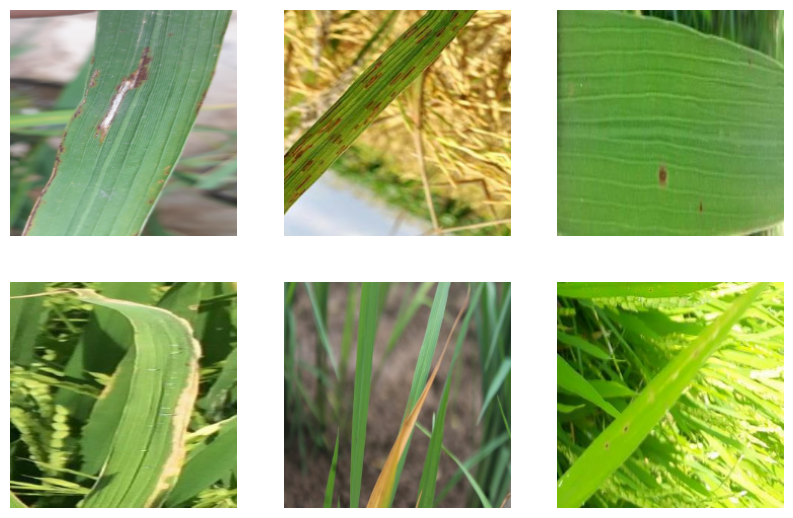

In [ ]:
plotter_lib.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):

  for var in range(6):

    ax = plotter_lib.subplot(3, 3, var + 1)

    plotter_lib.imshow(images[var].numpy().astype("uint8"))

    plotter_lib.axis("off")

#Traing the VGG19 Model

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19

##Load the VGG model
base_model = VGG19(
    weights="imagenet",
    include_top=False,
    input_shape=(224,224,3)
)
base_model.trainable = False #Not Trainable Weights

80134624/80134624 [==============================] - 2s 0us/step


In [ ]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

#Running the model on the training dataset

In [ ]:
model = Sequential()

model.add(base_model)
model.add(Flatten())
model.add(Dense(4096, activation="relu"))
model.add(Dense(4096, activation="relu"))
model.add(Dense(4, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 4096)              102764544 
                                                                 
 dense_1 (Dense)             (None, 4096)              16781312  
                                                                 
 dense_2 (Dense)             (None, 4)                 16388     
                                                                 
Total params: 139586628 (532.48 MB)
Trainable params: 119562244 (456.09 MB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

In [ ]:
##Creating a Model Checkpoint to save the best Model

model_checkpoint=ModelCheckpoint(
    "/content/drive/MyDrive/VGG19_Model_Final.weights.h5",
    monitor="val_accuracy",
    verbose=1,
    save_best_only=True,
    mode="max"
)

In [ ]:
history=model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    verbose=1,
    callbacks=[model_checkpoint]
)

Epoch 1/10
164/164 [==============================] - ETA: 0s - loss: 5.4471 - accuracy: 0.8809
Epoch 1: val_accuracy improved from -inf to 0.92601, saving model to /content/drive/MyDrive/CTE309 Mini Project/VGG19_Model_Final.weights.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


164/164 [==============================] - 1235s 7s/step - loss: 5.4471 - accuracy: 0.8809 - val_loss: 0.4114 - val_accuracy: 0.9260
Epoch 2/10
164/164 [==============================] - ETA: 0s - loss: 0.1442 - accuracy: 0.9785
Epoch 2: val_accuracy improved from 0.92601 to 0.94508, saving model to /content/drive/MyDrive/CTE309 Mini Project/VGG19_Model_Final.weights.h5
164/164 [==============================] - 74s 447ms/step - loss: 0.1442 - accuracy: 0.9785 - val_loss: 0.4410 - val_accuracy: 0.9451
Epoch 3/10
164/164 [==============================] - ETA: 0s - loss: 0.1632 - accuracy: 0.9792
Epoch 3: val_accuracy improved from 0.94508 to 0.95118, saving model to /content/drive/MyDrive/CTE309 Mini Project/VGG19_Model_Final.weights.h5
164/164 [==============================] - 56s 339ms/step - loss: 0.1632 - accuracy: 0.9792 - val_loss: 0.4230 - val_accuracy: 0.9512
Epoch 4/10
164/164 [==============================] - ETA: 0s - loss: 0.1617 - accuracy: 0.9815
Epoch 4: val_accuracy i

##Evaluating the currently saved model

In [ ]:
test_dataset_path="/content/drive/MyDrive/CTE309 Mini Project/Test Dataset"

In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dataset_path,
    labels="inferred",
    label_mode="categorical",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 3164 files belonging to 4 classes.


In [ ]:
##Evaluation using test data
test_loss, test_accuracy = model.evaluate(test_ds,batch_size=batch_size)
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_accuracy)

NameError: name 'model' is not defined

In [ ]:
##Evaluation using validation data
val_loss, val_accuracy = model.evaluate(val_ds,batch_size=batch_size)
print("Validation Loss: ", val_loss)
print("Validation Accuracy: ", val_accuracy)

21/21 [==============================] - 15s 690ms/step - loss: 0.5940 - accuracy: 0.9786
Test Loss:  0.5940044522285461
Test Accuracy:  0.9786259531974792


#Testing The Saved Model on The Test Dataset

In [ ]:
##Load the saved model
VGG19_model = load_model("/content/drive/MyDrive/CTE309 Mini Project/VGG19_Model_Final.weights.h5")

In [ ]:
##Compiling the model
VGG19_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
test_dataset_final = tf.keras.preprocessing.image_dataset_from_directory(
    test_dataset_path,
    labels="inferred",
    label_mode="categorical",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 3164 files belonging to 4 classes.


In [ ]:
##Evaluation using validation data
test_loss, test_accuracy = VGG19_model.evaluate(test_dataset_final,batch_size=batch_size)
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_accuracy)

99/99 [==============================] - 867s 8s/step - loss: 9.3325 - accuracy: 0.6760
Test Loss:  9.332452774047852
Test Accuracy:  0.6760429739952087
